Data Visualization

1- Preprocessing phase:
importing the dataset
Showing the head of the dataset then some general information about the data columns and values.

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Meriem\Desktop\AI\titanic-passengers.csv', sep=";")

print(df.head().to_string(),'\n \n') 
df.info()

   PassengerId Survived  Pclass                                         Name     Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked
0          343       No       2                   Collander, Mr. Erik Gustaf    male  28.0      0      0      248740  13.0000    NaN        S
1           76       No       3                      Moen, Mr. Sigurd Hansen    male  25.0      0      0      348123   7.6500  F G73        S
2          641       No       3                       Jensen, Mr. Hans Peder    male  20.0      0      0      350050   7.8542    NaN        S
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0      4      349909  21.0750    NaN        S
4          672       No       1                       Davidson, Mr. Thornton    male  31.0      1      0  F.C. 12750  52.0000    B71        S 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype

finding which columns contain missing values. The total missing values in each and every column.

In [2]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


the values for cabin.

In [3]:
print(df['Cabin'].head())

0      NaN
1    F G73
2      NaN
3      NaN
4      B71
Name: Cabin, dtype: object


the values for age.

In [4]:
print(df['Age'].head())

0    28.0
1    25.0
2    20.0
3    29.0
4    31.0
Name: Age, dtype: float64


the values for embarked

In [5]:
print(df['Embarked'].head())

0    S
1    S
2    S
3    S
4    S
Name: Embarked, dtype: object


replacing the missing age values with the MEAN. we can replace it with the mean, the median or the mode cause it's a numerical value.

In [2]:
df['Age'].fillna(df['Age'].mean, inplace=True)
print(df['Age'].head())

0    28.0
1    25.0
2    20.0
3    29.0
4    31.0
Name: Age, dtype: object


checking that the missing age values have been replaced.

In [7]:
print(df['Age'].isnull().sum())

0


Missing values of cabin.

In [8]:
print(df['Cabin'].isnull().sum())

687


finding the most frequent value.

In [4]:
print(df['Cabin'].value_counts())

G6             691
C23 C25 C27      4
B96 B98          4
D                3
C22 C26          3
              ... 
D45              1
F G63            1
A34              1
C85              1
E63              1
Name: Cabin, Length: 147, dtype: int64


Replacing the missing values of Cabin with the most frequent value, which is 'G6'.

In [4]:
df['Cabin'].fillna('G6',inplace=True)

checking that the missing Cabin values have been replaced.

In [6]:
print(df['Cabin'].isnull().sum())

0


Missing values of Embarked.

In [7]:
print(df['Embarked'].isnull().sum())

2


finding the most frequent value.

In [8]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Replacing the missing values of Embarked with the most frequent value, which is 'S', and checking that the missing Cabin values have been replaced.

In [10]:
df['Embarked'].fillna('S',inplace=True)
print(df['Embarked'].isnull().sum())

0


2. Visualization phase:

Visualization of the correlation between Sex and Age. for male passengers the older they are, the less they have a chance of survival, the opposite applies for females.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
sns.set(style='white')

In [16]:
sns.barplot(y='Age',x='Sex', data=df, hue='Survived')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

Visualization of the correlation between passenger class and Age. Passengers from the first class have a bigger survival rate.

In [12]:
sns.barplot(x='Pclass',y='Age', data=df,
            hue='Survived')
plt.show()

TypeError: '<' not supported between instances of 'method' and 'float'

this function "plot_correlation_map" gives us a heatmap that shows a two-dimensional graphical representation of the correlation between different columns (PassengerId, Pclass, Age, SibSp, Parch, Fare) that are contained in a matrix, and are represented as colours. The purpose is to better visualize the volume of events within the titanic dataset and assist in directing us towards areas on data visualizations that matter most like the correlation between Parch and SibSp.

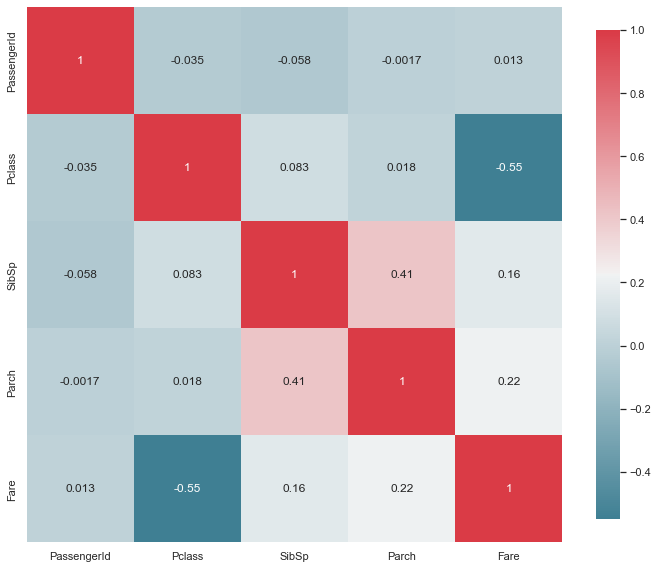

In [13]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map( df )

we used the groupby function to group "Pclass" and "Survived", and thanks to mean() we got an average value for the remaining columns. 
=> For exemple, for the first class an average of 410.300000 passengers didn't survive, and for the third class a mean of 394.058824 survived the drowning of the Titanic. For the second class the mean age of the survivors is 26.

In [14]:
df.groupby(['Pclass', 'Survived']).mean()

PassengerId     SibSp     Parch       Fare
Pclass Survived                                            
1      No         410.300000  0.287500  0.300000  64.684007
       Yes        491.772059  0.492647  0.389706  95.608029
2      No         452.123711  0.319588  0.144330  19.412328
       Yes        439.080460  0.494253  0.643678  22.055700
3      No         453.580645  0.672043  0.384409  13.669364
       Yes        394.058824  0.436975  0.420168  13.694887

dropping the useless columns (such as Names).

In [ ]:
df.drop(['Name', 'Ticket'], axis=1)

create a new column called Title which contains the appropriate Title for each individual.

In [ ]:
data = pd.read_csv(r'C:\Users\Meriem\Desktop\AI\titanic-passengers.csv', sep=";")
df['Title']=data['Name']
df

The correlation between Title and other features(e.g Sex, Fare, Age).

In [ ]:
df = pd.DataFrame(np.random.random((4, 4)), columns=["Title", "Sex", "Fare", "Age"])

sns.heatmap(df)

In [ ]:
#dd = pd.DataFrame([["Title", "Sex", "Fare", "Age"], ["Title"], ["Sex"], ["Fare"], ["Age"]])

#df = df.pivot('Title', 'Sex', 'Fare')
ax = sns.heatmap(df)
ax.scatter(df.Title, df.Sex, c=df.Fare,  cmap="copper")

Group these titles into more useful ones.

The correlation between Title and other features(e.g Sex, Fare, Age), using the new titles.

Use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Conclusion.